# Simple Implementation of [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset


In [3]:
import numpy as np
from matplotlib import pyplot as plt



def loadData(fileName, dataLen):
    """
    loads a file.data into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



    file = open(fileName, 'rb')
    data = [row.decode('utf-8').split(',') for row in file]
    file.close()

    data= data[:dataLen]

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1][:-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadData('iris-data/iris.data', 150)


# Normalize the data

mean:  [5.84333333 3.054      3.75866667 1.19866667]
std:  [0.82530129 0.43214658 1.75852918 0.76061262]


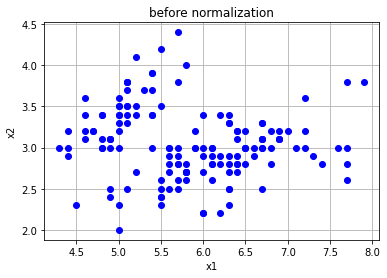

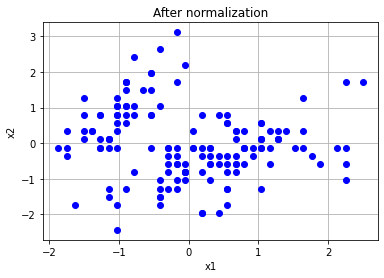

In [4]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [5]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOuput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOuput[i][true_i] =1

    return dataSetOuput
    
dataSetOuput =generateOuput(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], dataSetClass)
    

# Defining a hidden layer

W.shape= (4, 10)


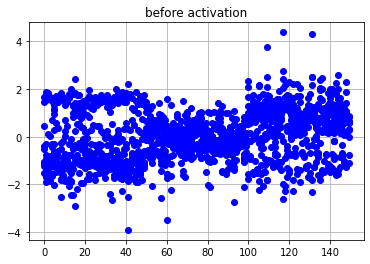

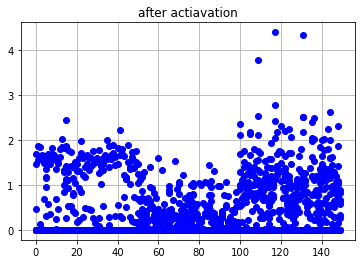

W.shape= (10, 3)


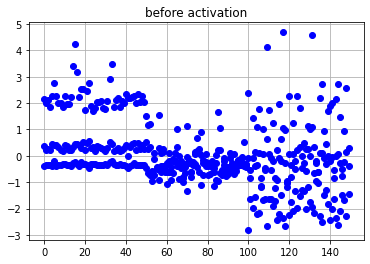

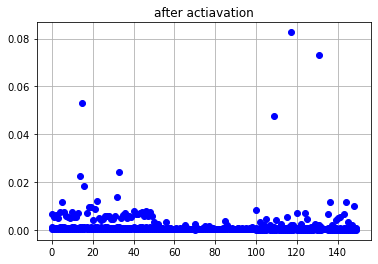

2


In [15]:


#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.exp(x)/np.sum(np.exp(x))}


actDrevative = {'leakRelu': lambda x:1 if x>0 else (0 if x==0 else .001) ,
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](f))}



#init weights 
hiddenLayerSizes = [10, 3]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop

# evaluating score

print(len(weights))

In [10]:
# split into train and test

# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [34]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
print(crossEntropyLoss(dataSetOuput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* np.sum(trueY/predictY - (1-trueY)/(1-predictY), axis=0)
    return d
    
print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

0.8573992140459634
test loss dervative: [-1.78571429  0.41666667  1.26984127]


In [46]:
#forward path
def forward(plot=False):
    outputFlow_list = []
    outputFlow_list.append(dataSetInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        # print("X: ", X.shape, ", W:", W.shape)
        
        H = np.matmul(X, W) #matrix multplixation
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
outputFlow_list = forward()
for i in range(len(outputFlow_list)): 
    print("flow[", i, ']=', outputFlow_list[i].shape)

flow[ 0 ]= (150, 4)
flow[ 1 ]= (150, 10)
flow[ 2 ]= (150, 10)
flow[ 3 ]= (150, 3)
flow[ 4 ]= (150, 3)


In [50]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOuput, y_hat)
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    drev = drev * yBeforeSig # 150 x 3
    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    
    #3- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
    drev = drev * reluDev # elemet wise product
    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(4 x 150) (150 x 10) = (4 x 10)
    weights[-2] -= lr * grad_step
    
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input

    
    
    

# Train

In [51]:
#forward
outputFlow_list = forward()

#loss calculations
loss = crossEntropyLoss(dataSetOuput, outputFlow_list[-1])
print(loss)

#evaluationg score


#backpropagation
backpropagationDetailed(.00001, outputFlow_list)

6.891793906552918


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [37]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 0], [3, 0]])
a * b

array([[1, 0],
       [9, 0]])